In [3]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-04-22 18:13:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

     0K ..........                                            100% 1.76M=0.006s

2022-04-22 18:13:50 (1.76 MB/s) - 'helper_functions.py' saved [10246/10246]



In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (216, 233, 3)


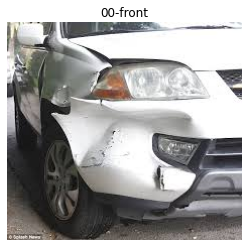

In [7]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data2a/training/",
                        target_class="00-front")

In [9]:
train="C:/Users/nthaku3/CS_512_Project/preprocessed/data2a/training/"
test="C:/Users/nthaku3/CS_512_Project/preprocessed/data2a/validation/"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42, shuffle=True )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [10]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
#from keras.preprocessing import image 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(3, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model_3 = Model(inputs = vgg.input, outputs = x)

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model 
history_3 = model_3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 134s 4s/step - loss: 2.0880 - accuracy: 0.4637 - val_loss: 0.9735 - val_accuracy: 0.5848
Epoch 2/10
31/31 [==============================] - 146s 5s/step - loss: 0.5442 - accuracy: 0.7875 - val_loss: 0.7667 - val_accuracy: 0.6842
Epoch 3/10
31/31 [==============================] - 157s 5s/step - loss: 0.2932 - accuracy: 0.9173 - val_loss: 0.8022 - val_accuracy: 0.6725
Epoch 4/10
31/31 [==============================] - 145s 5s/step - loss: 0.1792 - accuracy: 0.9745 - val_loss: 0.7330 - val_accuracy: 0.7251
Epoch 5/10
31/31 [==============================] - 169s 5s/step - loss: 0.1172 - accuracy: 0.9908 - val_loss: 0.7540 - val_accuracy: 0.7193
Epoch 6/10
31/31 [==============================] - 162s 5s/step - loss: 0.0869 - accuracy: 0.9939 - val_loss: 0.7398 - val_accuracy: 0.7135
Epoch 7/10
31/31 [==============================] - 163s 5s/step - loss: 0.0659 - accuracy: 0.9928 - val_loss: 0.7560 - val_accuracy: 0.7251
Epoch 8/10
31

In [11]:
model_3.save('car_damage_location_model.h5')

In [16]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def pred_and_plot(model, filename):
    
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred=pred.argmax()

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred}")
    plt.axis(False);

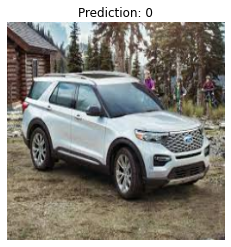

In [17]:
# Test our model 
pred_and_plot(model_3,"C:/Users/nthaku3/CS_512_Project/preprocessed/test3.jpg")

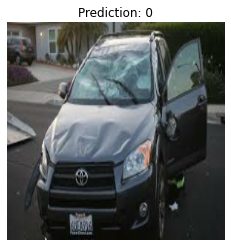

In [18]:
# Test our model 
pred_and_plot(model_3,"C:/Users/nthaku3/CS_512_Project/preprocessed/test2.jpg")

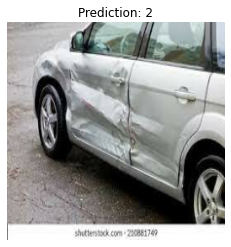

In [20]:
# Test our model 
pred_and_plot(model_3,"C:/Users/nthaku3/CS_512_Project/preprocessed/test4.jpg")

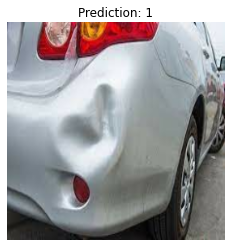

In [21]:
# Test our model 
pred_and_plot(model_3,"C:/Users/nthaku3/CS_512_Project/preprocessed/test5.jpg")